In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
carData = pd.read_csv('datasets/cars_raw.csv')
carData.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [3]:
carData.columns

Index(['Year', 'Make', 'Model', 'Used/New', 'Price', 'ConsumerRating',
       'ConsumerReviews', 'SellerType', 'SellerName', 'SellerRating',
       'SellerReviews', 'StreetName', 'State', 'Zipcode', 'DealType',
       'ComfortRating', 'InteriorDesignRating', 'PerformanceRating',
       'ValueForMoneyRating', 'ExteriorStylingRating', 'ReliabilityRating',
       'ExteriorColor', 'InteriorColor', 'Drivetrain', 'MinMPG', 'MaxMPG',
       'FuelType', 'Transmission', 'Engine', 'VIN', 'Stock#', 'Mileage'],
      dtype='object')

In [4]:
feature = ['Year','Make','Used/New','Price','ConsumerRating',
           'ConsumerReviews','SellerType','SellerRating','SellerReviews',
           'State','Mileage','ExteriorColor','FuelType']

selectedData = carData[feature]
selectedData.head()

,Year,Make,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerRating,SellerReviews,State,Mileage,ExteriorColor,FuelType
0,2019,Toyota,Used,"$39,998",4.6,45,Dealer,3.3,3,CA,29403,Red,Gasoline
1,2018,Ford,Used,"$49,985",4.8,817,Dealer,4.8,131,CA,32929,Shadow Black,Gasoline
2,2017,RAM,Used,"$41,860",4.7,495,Dealer,4.6,249,CA,23173,Granite Crystal Clearcoat Metallic,Gasoline
3,2021,Honda,Used,"$28,500",5.0,36,Dealer,4.6,284,NV,10598,Gray,Gasoline
4,2020,Lexus,Used,"$49,000",4.8,76,Dealer,4.8,4755,NV,28137,Eminent White Pearl,Gasoline


In [5]:
selectedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             9379 non-null   int64  
 1   Make             9379 non-null   object 
 2   Used/New         9379 non-null   object 
 3   Price            9379 non-null   object 
 4   ConsumerRating   9379 non-null   float64
 5   ConsumerReviews  9379 non-null   int64  
 6   SellerType       9379 non-null   object 
 7   SellerRating     9379 non-null   float64
 8   SellerReviews    9379 non-null   int64  
 9   State            9379 non-null   object 
 10  Mileage          9379 non-null   int64  
 11  ExteriorColor    9379 non-null   object 
 12  FuelType         9379 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 952.7+ KB


In [6]:
selectedData['usedYear'] = 2023 - selectedData['Year']
display(selectedData.head())

/var/folders/m3/18xjklpd0hx8b6p1w532zfth0000gn/T/ipykernel_7784/164984410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectedData['usedYear'] = 2023 - selectedData['Year']


,Year,Make,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerRating,SellerReviews,State,Mileage,ExteriorColor,FuelType,usedYear
0,2019,Toyota,Used,"$39,998",4.6,45,Dealer,3.3,3,CA,29403,Red,Gasoline,4
1,2018,Ford,Used,"$49,985",4.8,817,Dealer,4.8,131,CA,32929,Shadow Black,Gasoline,5
2,2017,RAM,Used,"$41,860",4.7,495,Dealer,4.6,249,CA,23173,Granite Crystal Clearcoat Metallic,Gasoline,6
3,2021,Honda,Used,"$28,500",5.0,36,Dealer,4.6,284,NV,10598,Gray,Gasoline,2
4,2020,Lexus,Used,"$49,000",4.8,76,Dealer,4.8,4755,NV,28137,Eminent White Pearl,Gasoline,3


Decided to visualize the Price depended on the fuel type

In [7]:
uniqueFuelType = selectedData['FuelType'].unique()
uniqueFuelType

array(['Gasoline', 'Gasoline Fuel', 'Electric Fuel System',
       'E85 Flex Fuel', 'Electric', 'Hybrid', 'Plug-In Electric/Gas', '–',
       'Flex Fuel Capability', 'Diesel', 'Diesel Fuel',
       'Gasoline/Mild Electric Hybrid', 'Flexible Fuel'], dtype=object)

need to drop '-' and divid the FuelType

In [8]:
elec = ['Electric Fuel System','Electric','Plug-In Electric/Gas']
hybrid = ['Flexible Fuel','Hybrid','Gasoline/Mild Electric Hybrid']
trad = ['Gasoline Fuel', 'Diesel Fuel','Gasoline','Diesel']

In [9]:
visual = selectedData[['Mileage','Price','FuelType','usedYear','Year']]
visual.columns = ['Mileage', 'Price_str', 'FuelType', 'usedYear', 'Year']
visual

,Mileage,Price_str,FuelType,usedYear,Year
0,29403,"$39,998",Gasoline,4,2019
1,32929,"$49,985",Gasoline,5,2018
2,23173,"$41,860",Gasoline,6,2017
3,10598,"$28,500",Gasoline,2,2021
4,28137,"$49,000",Gasoline,3,2020
...,...,...,...,...,...
9374,15606,"$27,374",Gasoline,4,2019
9375,46855,"$61,998",Hybrid,4,2019
9376,62649,"$26,944",Gasoline,6,2017
9377,30760,"$28,568",Gasoline,4,2019


Type of the Price Column is object so need to convert into float or int

And drop 'Not Priced'

In [15]:
# visual = visual[visual['Price_str'].str.contains('$')]
indexNoPrice = visual[visual['Price_str'].str.contains('Not Priced')].index
visual.drop(indexNoPrice,inplace = True)
visual['Price_int'] = visual.Price_str.str.replace('$','').str.replace(',','').astype('int')
# visual.info()
visual

/var/folders/m3/18xjklpd0hx8b6p1w532zfth0000gn/T/ipykernel_7784/2602834644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visual.drop(indexNoPrice,inplace = True)
/var/folders/m3/18xjklpd0hx8b6p1w532zfth0000gn/T/ipykernel_7784/2602834644.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  visual['Price_int'] = visual.Price_str.str.replace('$','').str.replace(',','').astype('int')
/var/folders/m3/18xjklpd0hx8b6p1w532zfth0000gn/T/ipykernel_7784/2602834644.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Mileage,Price_str,FuelType,usedYear,Year,Price_int,MxY
0,29403,"$39,998",Gasoline,4,2019,39998,117612
1,32929,"$49,985",Gasoline,5,2018,49985,164645
2,23173,"$41,860",Gasoline,6,2017,41860,139038
3,10598,"$28,500",Gasoline,2,2021,28500,21196
4,28137,"$49,000",Gasoline,3,2020,49000,84411
...,...,...,...,...,...,...,...
9374,15606,"$27,374",Gasoline,4,2019,27374,62424
9375,46855,"$61,998",Hybrid,4,2019,61998,187420
9376,62649,"$26,944",Gasoline,6,2017,26944,375894
9377,30760,"$28,568",Gasoline,4,2019,28568,123040


In [11]:
visual['MxY'] = visual['Mileage'] * visual['usedYear']

/var/folders/m3/18xjklpd0hx8b6p1w532zfth0000gn/T/ipykernel_7784/3611463312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visual['MxY'] = visual['Mileage'] * visual['usedYear']


We can recognize that Electric car is tend to be new (absolutely) and expensive

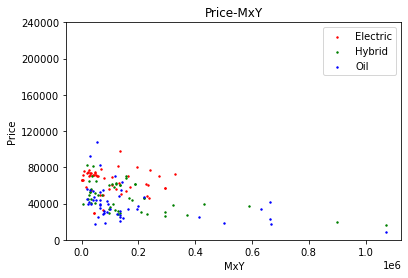

<Figure size 36000x36000 with 0 Axes>

In [12]:
nSample = 50
elecData = visual[visual.FuelType.isin(elec)].sample(n=nSample)
hybridData = visual[visual.FuelType.isin(hybrid)].sample(n=nSample)
tradData = visual[visual.FuelType.isin(trad)].sample(n=nSample)

plt.scatter(elecData['MxY'],elecData['Price_int'],c='red',s=2,label='Electric')
plt.scatter(hybridData['MxY'],hybridData['Price_int'],c='green',s=2,label='Hybrid')
plt.scatter(tradData['MxY'],tradData['Price_int'],c='blue',s=2,label='Oil')
plt.legend()
plt.yticks(np.arange(0,250000,40000))
plt.ylabel("Price")
plt.xlabel("MxY")
plt.title("Price-MxY")
plt.figure(figsize=(500,500))
# plt.savefig('temp.png')
plt.show()

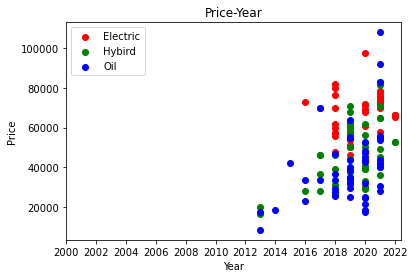

<Figure size 36000x36000 with 0 Axes>

In [13]:
lineStyle = '--'
plt.scatter(elecData['Year'],elecData['Price_int'],color='red',label='Electric')
plt.scatter(hybridData['Year'],hybridData['Price_int'],color='green',label='Hybird')
plt.scatter(tradData['Year'],tradData['Price_int'],color='blue',label='Oil')
plt.legend()
plt.xticks(np.arange(2000,2024,2))
plt.ylabel("Price")
plt.xlabel("Year")
plt.title("Price-Year")
plt.figure(figsize=(500,500))
plt.show()


Box plot will help us to understand more accurate

And we can predict(or interpret) the high outliers in Oil can be SuperCar or Old Classic Car

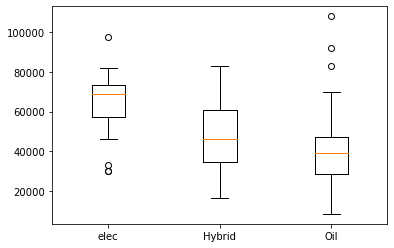

In [14]:
fig, ax = plt.subplots()
ax.boxplot([elecData['Price_int'],hybridData['Price_int'],tradData['Price_int']])
plt.xticks([1,2,3],
           ["elec","Hybrid","Oil"])
plt.show()